In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Ex 3

### 3a Propotional Rate

In [4]:
class Clock():
    def __init__(self, fixed_rate = None):
        self.fixed_rate = fixed_rate
    
    def tick(self, rate = None):
        if rate is None:
            if self.fixed_rate is None:
                return None
            else:
                return -np.log(np.random.rand())/self.fixed_rate
        else:
            if rate == 0:
                return np.inf
            else:
                return -np.log(np.random.rand())/rate 
        
class Node():
    def __init__(self, id):
        self.id = id
        self.num_particles = 0

In [5]:
Lambda = [
[0, 3/4, 3/4, 0, 0],
[0, 0, 1/4, 1/4, 2/4],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 0, 0]]

w = np.sum(Lambda, axis=1)
w_star = np.max(w)
# compute the off-diagonal part of Q
P_bar = Lambda/w_star 
# add the diagonal part
P_bar = P_bar + np.diag(np.ones(len(w))-np.sum(P_bar,axis=1))

# compute dominant eigenvector
values,vectors = np.linalg.eig(P_bar.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
print("pi_bar=", pi_bar)

nstates = len(pi_bar)

pi_bar= [0. 0. 0. 0. 1.]


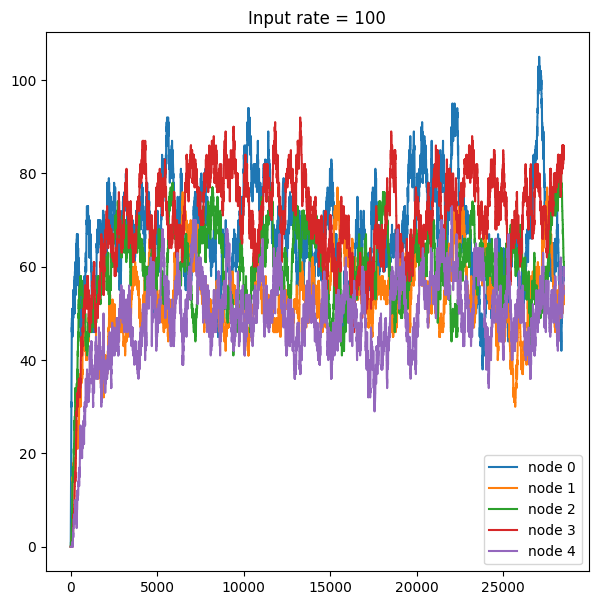

In [19]:
threshold = 60
input_rate = 100
output_rate = 2

node_ids = [0,1,2,3,4] #represent o,a,b,c,d
nodes = [Node(id) for id in node_ids ]

clock_input = Clock(fixed_rate=input_rate)
clock_output = Clock(fixed_rate=None)
clock_node = Clock(fixed_rate=None)

w = np.sum(Lambda, axis = 1)
P = np.diag(1 / w[:4]).dot(Lambda[:4])

time = 0

record = []

while time < threshold:
    N = np.array([nodes[i].num_particles for i in node_ids])
    record.append(N)

    l = []
    l.append(clock_input.tick())
    l.extend([clock_node.tick(rate = r) for r in N[:4] * w[:4]])
    l.append(clock_output.tick(N[4]*output_rate))

    action = np.argmin(l)

    if action == 0:
        nodes[0].num_particles += 1
    elif action == 5:
        if nodes[4].num_particles > 0:
            nodes[4].num_particles -= 1
    else:
        chosen_node = action - 1
        to_node = np.random.choice(node_ids, p=P[chosen_node,:])

        if nodes[chosen_node].num_particles > 0:
            nodes[chosen_node].num_particles -= 1
            nodes[to_node].num_particles +=1
    
    time += np.min(l)

record.append(N)

record = np.array(record)  

fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for node in node_ids:
    trajectory = record[:,node]
    x = [i for i in range(len(trajectory))]

    ax.plot(x, trajectory, label='node {0:d}'.format(node))
    
ax.legend()
ax.set_title(label = 'Input rate = 100')
plt.savefig('fig/proportional_100')


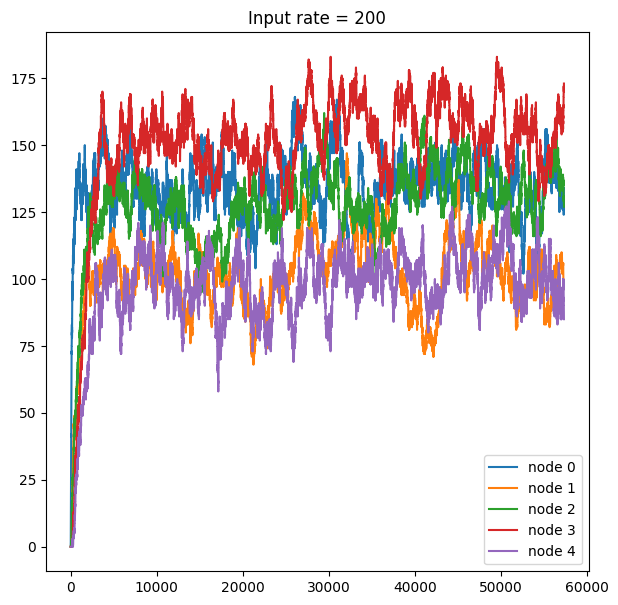

In [20]:
threshold = 60
input_rate = 200
output_rate = 2

node_ids = [0,1,2,3,4] #represent o,a,b,c,d
nodes = [Node(id) for id in node_ids ]

clock_input = Clock(fixed_rate=input_rate)
clock_output = Clock(fixed_rate=None)
clock_node = Clock(fixed_rate=None)

w = np.sum(Lambda, axis = 1)
P = np.diag(1 / w[:4]).dot(Lambda[:4])

time = 0

record = []

while time < threshold:
    N = np.array([nodes[i].num_particles for i in node_ids])
    record.append(N)

    l = []
    l.append(clock_input.tick())
    l.extend([clock_node.tick(rate = r) for r in N[:4] * w[:4]])
    l.append(clock_output.tick(N[4]*output_rate))

    action = np.argmin(l)

    if action == 0:
        nodes[0].num_particles += 1
    elif action == 5:
        if nodes[4].num_particles > 0:
            nodes[4].num_particles -= 1
    else:
        chosen_node = action - 1
        to_node = np.random.choice(node_ids, p=P[chosen_node,:])

        if nodes[chosen_node].num_particles > 0:
            nodes[chosen_node].num_particles -= 1
            nodes[to_node].num_particles +=1
    
    time += np.min(l)

record.append(N)

record = np.array(record)  

fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for node in node_ids:
    trajectory = record[:,node]
    x = [i for i in range(len(trajectory))]

    ax.plot(x, trajectory, label='node {0:d}'.format(node))
    
ax.legend()

ax.set_title(label = 'Input rate = 200')
plt.savefig('fig/proportional_200')


### 3b Fixed rate

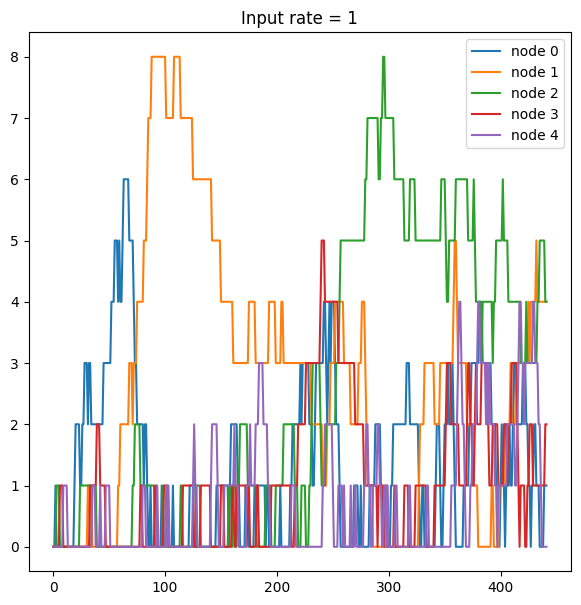

In [21]:
threshold = 60
input_rate = 1
output_rate = 2

node_ids = [0,1,2,3,4] #represent o,a,b,c,d
nodes = [Node(id) for id in node_ids ]

clock_input = Clock(fixed_rate=input_rate)
clock_output = Clock(fixed_rate=output_rate)
clock_node = Clock(fixed_rate=None)

w = np.sum(Lambda, axis = 1)
P = np.diag(1 / w[:4]).dot(Lambda[:4])

time = 0

record = []

while time < threshold:
    N = np.array([nodes[i].num_particles for i in node_ids])
    record.append(N)

    l = []
    l.append(clock_input.tick())
    l.extend([clock_node.tick(rate = r) for r in w[:4]])
    l.append(clock_output.tick())

    action = np.argmin(l)

    if action == 0:
        nodes[0].num_particles += 1
    elif action == 5:
        if nodes[4].num_particles > 0:
            nodes[4].num_particles -= 1
    else:
        chosen_node = action - 1
        to_node = np.random.choice(node_ids, p=P[chosen_node,:])

        if nodes[chosen_node].num_particles > 0:
            nodes[chosen_node].num_particles -= 1
            nodes[to_node].num_particles +=1
    
    time += np.min(l)

record.append(N)

record = np.array(record)  

fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for node in node_ids:
    trajectory = record[:,node]
    x = [i for i in range(len(trajectory))]

    ax.plot(x, trajectory, label='node {0:d}'.format(node))
    
ax.legend()
ax.set_title(label = 'Input rate = 1')
plt.savefig('fig/fix_1')




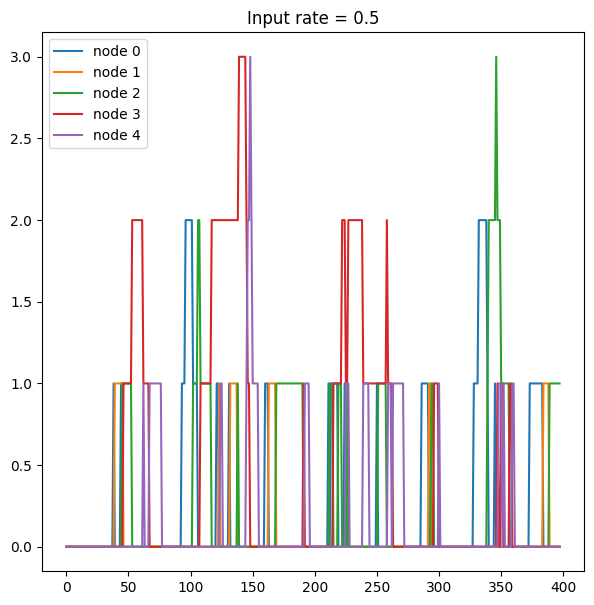

In [22]:
threshold = 60
input_rate = 0.5
output_rate = 2

node_ids = [0,1,2,3,4] #represent o,a,b,c,d
nodes = [Node(id) for id in node_ids ]

clock_input = Clock(fixed_rate=input_rate)
clock_output = Clock(fixed_rate=output_rate)
clock_node = Clock(fixed_rate=None)

w = np.sum(Lambda, axis = 1)
P = np.diag(1 / w[:4]).dot(Lambda[:4])

time = 0

record = []

while time < threshold:
    N = np.array([nodes[i].num_particles for i in node_ids])
    record.append(N)

    l = []
    l.append(clock_input.tick())
    l.extend([clock_node.tick(rate = r) for r in w[:4]])
    l.append(clock_output.tick())

    action = np.argmin(l)

    if action == 0:
        nodes[0].num_particles += 1
    elif action == 5:
        if nodes[4].num_particles > 0:
            nodes[4].num_particles -= 1
    else:
        chosen_node = action - 1
        to_node = np.random.choice(node_ids, p=P[chosen_node,:])

        if nodes[chosen_node].num_particles > 0:
            nodes[chosen_node].num_particles -= 1
            nodes[to_node].num_particles +=1
    
    time += np.min(l)

record.append(N)

record = np.array(record)  

fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for node in node_ids:
    trajectory = record[:,node]
    x = [i for i in range(len(trajectory))]

    ax.plot(x, trajectory, label='node {0:d}'.format(node))
    
ax.legend()
ax.set_title(label = 'Input rate = 0.5')
plt.savefig('fig/fix_half')



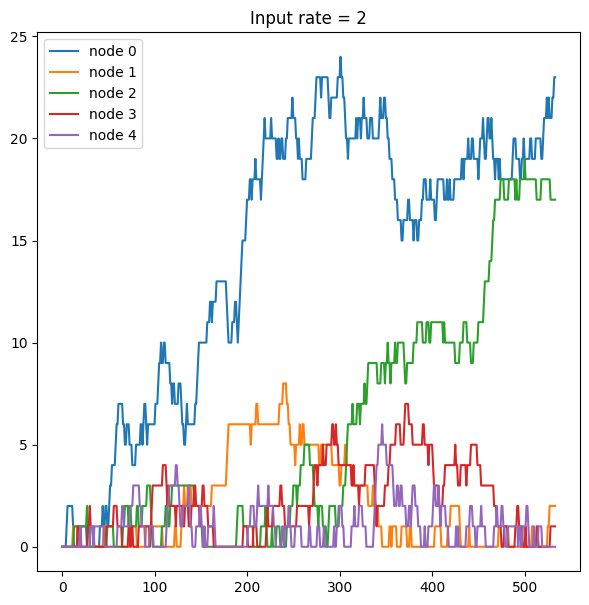

In [23]:
threshold = 60
input_rate = 2
output_rate = 2

node_ids = [0,1,2,3,4] #represent o,a,b,c,d
nodes = [Node(id) for id in node_ids ]

clock_input = Clock(fixed_rate=input_rate)
clock_output = Clock(fixed_rate=output_rate)
clock_node = Clock(fixed_rate=None)

w = np.sum(Lambda, axis = 1)
P = np.diag(1 / w[:4]).dot(Lambda[:4])

time = 0

record = []

while time < threshold:
    N = np.array([nodes[i].num_particles for i in node_ids])
    record.append(N)

    l = []
    l.append(clock_input.tick())
    l.extend([clock_node.tick(rate = r) for r in w[:4]])
    l.append(clock_output.tick())

    action = np.argmin(l)

    if action == 0:
        nodes[0].num_particles += 1
    elif action == 5:
        if nodes[4].num_particles > 0:
            nodes[4].num_particles -= 1
    else:
        chosen_node = action - 1
        to_node = np.random.choice(node_ids, p=P[chosen_node,:])

        if nodes[chosen_node].num_particles > 0:
            nodes[chosen_node].num_particles -= 1
            nodes[to_node].num_particles +=1
    
    time += np.min(l)

record.append(N)

record = np.array(record)  

fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for node in node_ids:
    trajectory = record[:,node]
    x = [i for i in range(len(trajectory))]

    ax.plot(x, trajectory, label='node {0:d}'.format(node))
    
ax.legend()
ax.set_title(label = 'Input rate = 2')
plt.savefig('fig/fix_2')

